In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# 2: Create a binary classification dataset

In [2]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

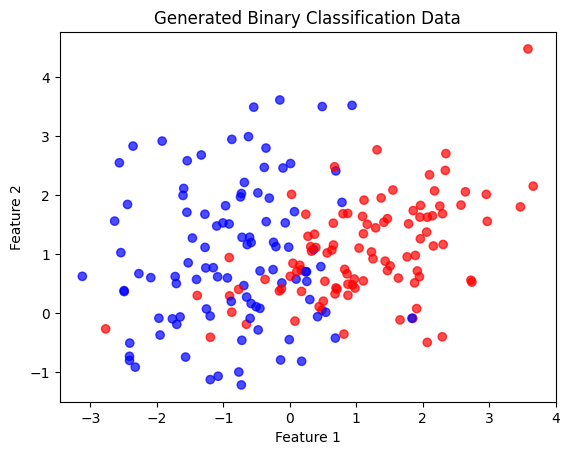

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Generated Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 3: Split data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4: Create and train Logistic Regression model

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 5: Make predictions

In [6]:
y_pred = model.predict(X_test)

# 6: Evaluate the model

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        30
           1       0.77      1.00      0.87        20

    accuracy                           0.88        50
   macro avg       0.88      0.90      0.88        50
weighted avg       0.91      0.88      0.88        50



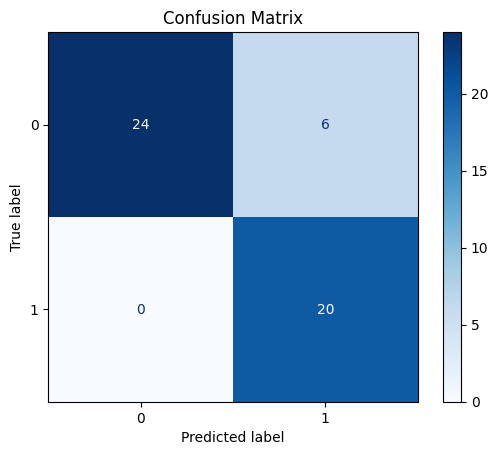

In [7]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 7: Visualize Decision Boundary

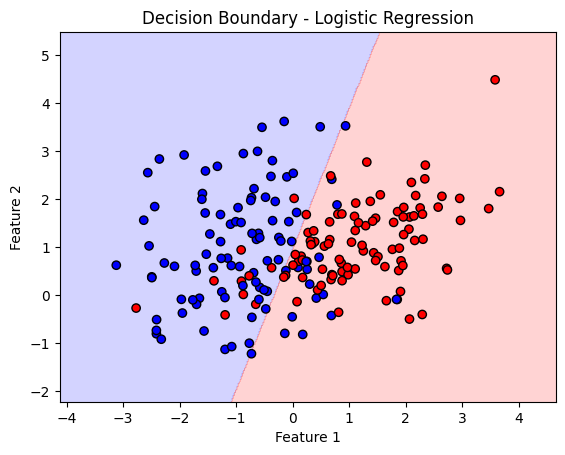

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Decision Boundary - Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()